<a href="https://colab.research.google.com/github/250183024-pixel/Project-2./blob/main/scrpproject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#part 1 Almat, Yessenzhan

In [ ]:
import time
import os
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from concurrent.futures import ThreadPoolExecutor, as_completed

In [ ]:
API_KEY = "b87daa5dd0c344dcb9f1150ba755f142"
BASE_URL = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest"
HEADERS = {"X-CMC_PRO_API_KEY": API_KEY, "Accepts": "application/json"}
OUT_CSV = "coinmarketcap_full.csv"


TARGET_N = 12000
PAGE_LIMIT = 500
MAX_WORKERS = 5
SLEEP_BETWEEN_REQUESTS = 0.2

def fetch_chunk(start=1, limit=100):
    """Запрос к API для одной страницы"""
    params = {"start": start, "limit": limit, "convert": "USD"}
    r = requests.get(BASE_URL, headers=HEADERS, params=params, timeout=30)
    r.raise_for_status()
    return r.json().get("data", [])

def fetch_range(start):
    """Обработка одной страницы: возвращает список словарей"""
    try:
        data = fetch_chunk(start=start, limit=PAGE_LIMIT)
        rows = []
        for item in data:
            rows.append({
                "id": item.get("id"),
                "name": item.get("name"),
                "symbol": item.get("symbol"),
                "slug": item.get("slug"),
                "cmc_rank": item.get("cmc_rank"),
                "date_added": item.get("date_added"),
                "max_supply": item.get("max_supply"),
                "circulating_supply": item.get("circulating_supply"),
                "total_supply": item.get("total_supply"),
                "tags": "|".join(item.get("tags", [])),
                "num_market_pairs": item.get("num_market_pairs"),
                "price_usd": item.get("quote", {}).get("USD", {}).get("price"),
                "volume_24h": item.get("quote", {}).get("USD", {}).get("volume_24h"),
                "market_cap": item.get("quote", {}).get("USD", {}).get("market_cap"),
                "percent_change_1h": item.get("quote", {}).get("USD", {}).get("percent_change_1h"),
                "percent_change_24h": item.get("quote", {}).get("USD", {}).get("percent_change_24h"),
                "percent_change_7d": item.get("quote", {}).get("USD", {}).get("percent_change_7d")
            })
        time.sleep(SLEEP_BETWEEN_REQUESTS)
        print(f"Fetched start={start} rows={len(rows)}")
        return rows
    except Exception as e:
        print(f"Error fetching start={start}: {e}")
        return []

def main():
    starts = list(range(1, TARGET_N + 1, PAGE_LIMIT))
    all_rows = []

    with ThreadPoolExecutor(max_workers=MAX_WORKERS) as executor:
        future_to_start = {executor.submit(fetch_range, s): s for s in starts}
        for future in as_completed(future_to_start):
            rows = future.result()
            all_rows.extend(rows)

    print(f"Total rows collected: {len(all_rows)}")
    df = pd.DataFrame(all_rows)
    df.to_csv(OUT_CSV, index=False)
    print(f"Saved {OUT_CSV}")

if __name__ == "__main__":
    main()

Fetched start=1 rows=500
Fetched start=501 rows=500
Fetched start=1501 rows=500
Fetched start=2001 rows=500
Fetched start=2501 rows=500
Fetched start=3001 rows=500
Fetched start=3501 rows=500
Fetched start=4001 rows=500
Fetched start=4501 rows=500
Fetched start=1001 rows=500
Fetched start=5001 rows=500
Fetched start=6001 rows=500
Fetched start=5501 rows=500
Fetched start=6501 rows=500
Fetched start=7001 rows=500
Fetched start=8001 rows=500
Fetched start=7501 rows=500
Fetched start=8501 rows=500
Fetched start=9001 rows=3
Fetched start=9501 rows=0
Fetched start=10001 rows=0
Fetched start=10501 rows=0
Fetched start=11001 rows=0
Fetched start=11501 rows=0
Total rows collected: 9003
Saved coinmarketcap_full.csv


#part 2 Daryn , Ismail

In [ ]:
df = pd.read_csv("coinmarketcap_full.csv")

In [ ]:
# 1. Column name standardization
df.columns = df.columns.str.lower().str.strip()

In [ ]:
# 2. Data inspection
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8915 entries, 0 to 8914
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  8915 non-null   int64  
 1   name                8915 non-null   object 
 2   symbol              8915 non-null   object 
 3   slug                8915 non-null   object 
 4   cmc_rank            8915 non-null   int64  
 5   date_added          8915 non-null   object 
 6   max_supply          6307 non-null   float64
 7   circulating_supply  8915 non-null   float64
 8   total_supply        8915 non-null   float64
 9   tags                8915 non-null   object 
 10  num_market_pairs    8915 non-null   int64  
 11  price_usd           8915 non-null   float64
 12  volume_24h          8915 non-null   float64
 13  market_cap          8915 non-null   float64
 14  percent_change_1h   8915 non-null   float64
 15  percent_change_24h  8915 non-null   float64
 16  percen

,id,cmc_rank,max_supply,circulating_supply,total_supply,num_market_pairs,price_usd,volume_24h,market_cap,percent_change_1h,percent_change_24h,percent_change_7d,liquidity_ratio,price_log,market_cap_log,volume_log
count,8915.000000,8915.000000,6.307000e+03,8.915000e+03,8.915000e+03,8915.000000,8.915000e+03,8.915000e+03,8.915000e+03,8915.000000,8915.000000,8.915000e+03,3771.000000,8915.000000,8915.000000,8915.000000
mean,25046.628940,4479.840269,2.210810e+21,4.902245e+20,7.686436e+22,68.107908,1.675584e+07,3.293400e+07,3.799597e+08,3.042874,11.441081,1.394248e+08,0.511772,0.397117,6.170240,6.671246
std,11824.435238,2593.793694,1.318505e+23,4.498616e+22,7.200098e+24,1795.904528,1.114742e+09,1.396089e+09,2.027601e+10,282.000634,405.497525,1.316439e+10,4.171566,1.443631,7.466799,6.157036
min,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,-65.613322,-99.981667,-9.979348e+01,0.000000,0.000000,0.000000,0.000000
25%,14434.000000,2234.500000,2.068826e+08,0.000000e+00,9.999012e+07,3.000000,0.000000e+00,0.000000e+00,0.000000e+00,-0.031688,-0.077053,-6.504777e+00,0.000690,0.000000,0.000000,0.000000
50%,29454.000000,4470.000000,1.000000e+09,0.000000e+00,9.999816e+08,9.000000,0.000000e+00,2.137510e+03,0.000000e+00,0.000000,0.973540,-4.251547e-01,0.044782,0.000000,0.000000,7.667863
75%,35130.500000,6719.500000,1.000000e+10,2.002500e+08,4.000000e+09,26.000000,4.000000e-02,1.509900e+05,9.864506e+05,0.023512,4.607190,4.229800e+00,0.213084,0.039221,13.801869,11.924975
max,39094.000000,9003.000000,1.000000e+25,4.245746e+24,6.798146e+26,161448.000000,8.170219e+10,1.074238e+11,1.849974e+12,26624.219621,29222.838391,1.242972e+12,165.512049,25.126347,28.246193,25.400048


In [ ]:
# 3. Convert numeric columns

numeric_columns = [
    'price_usd',
    'market_cap',
    'volume_24h'
]

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [ ]:
# 4. Clean text columns

df['name'] = df['name'].astype(str).str.strip()
df['symbol'] = df['symbol'].astype(str).str.upper()
df['tags'] = df['tags'].astype(str).str.lower().str.strip()

# Replace missing or empty tags
df['tags'] = df['tags'].replace(['nan', '', 'none'], 'unknown')

In [ ]:
# 5. Identify missing values

df.isnull().sum()


,0
id,0
name,0
symbol,0
slug,0
cmc_rank,0
date_added,0
max_supply,2625
circulating_supply,0
total_supply,0
tags,0


In [ ]:
# 6. Handle missing values

df = df.dropna(subset=[
    'price_usd',
    'market_cap',
    'volume_24h'
])

In [ ]:
# 7. Remove duplicates

df = df.drop_duplicates(subset=['name', 'symbol'])

In [ ]:
# 8. Remove logically impossible values

df = df[
    (df['price_usd'] > 0) &
    (df['market_cap'] >= 0) &
    (df['volume_24h'] >= 0)
]


In [ ]:
# 9. Feature engineering

# Liquidity ratio: how actively traded relative to size
df['liquidity_ratio'] = df['volume_24h'] / df['market_cap']

# Log-transformed features for EDA visualizations
df['price_log'] = np.log1p(df['price_usd'])
df['market_cap_log'] = np.log1p(df['market_cap'])
df['volume_log'] = np.log1p(df['volume_24h'])

In [ ]:
# 10. Final check

df.describe()


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4779: RuntimeWarning:

invalid value encountered in subtract



,id,cmc_rank,max_supply,circulating_supply,total_supply,num_market_pairs,price_usd,volume_24h,market_cap,percent_change_1h,percent_change_24h,percent_change_7d,liquidity_ratio,price_log,market_cap_log,volume_log
count,8915.000000,8915.000000,6.307000e+03,8.915000e+03,8.915000e+03,8915.000000,8.915000e+03,8.915000e+03,8.915000e+03,8915.000000,8915.000000,8.915000e+03,6117.000000,8.915000e+03,8915.000000,8915.000000
mean,25046.628940,4479.840269,2.210810e+21,4.902245e+20,7.686436e+22,68.107908,1.675584e+07,3.293400e+07,3.799597e+08,3.042874,11.441081,1.394248e+08,inf,3.973900e-01,6.170240,6.671246
std,11824.435238,2593.793694,1.318505e+23,4.498616e+22,7.200098e+24,1795.904528,1.114742e+09,1.396089e+09,2.027601e+10,282.000634,405.497525,1.316439e+10,NaN,1.443553e+00,7.466799,6.157036
min,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.043000e-21,0.000000e+00,0.000000e+00,-65.613322,-99.981667,-9.979348e+01,0.000000,1.043000e-21,0.000000,0.000000
25%,14434.000000,2234.500000,2.068826e+08,0.000000e+00,9.999012e+07,3.000000,6.088283e-05,0.000000e+00,0.000000e+00,-0.031688,-0.077053,-6.504777e+00,0.019459,6.088098e-05,0.000000,0.000000
50%,29454.000000,4470.000000,1.000000e+09,0.000000e+00,9.999816e+08,9.000000,1.390064e-03,2.137506e+03,0.000000e+00,0.000000,0.973540,-4.251547e-01,0.321591,1.389099e-03,0.000000,7.667863
75%,35130.500000,6719.500000,1.000000e+10,2.002500e+08,4.000000e+09,26.000000,4.182656e-02,1.509900e+05,9.864506e+05,0.023512,4.607190,4.229800e+00,NaN,4.097548e-02,13.801869,11.924975
max,39094.000000,9003.000000,1.000000e+25,4.245746e+24,6.798146e+26,161448.000000,8.170219e+10,1.074238e+11,1.849974e+12,26624.219621,29222.838391,1.242972e+12,inf,2.512635e+01,28.246193,25.400048


In [ ]:
# Rounding values
for col in ['price_usd', 'market_cap', 'volume_24h', 'liquidity_ratio']:
    if col in df.columns:
        df[col] = df[col].round(2)

In [ ]:
# Create liquidity ratio first
df['liquidity_ratio'] = df['volume_24h'] / df['market_cap'].replace(0, pd.NA)

# TAG CLEANING
tags_exploded = (
    df[['price_usd','market_cap','volume_24h','liquidity_ratio','tags']]
    .dropna(subset=['tags'])
    .assign(tag=lambda x: x['tags'].str.split('|'))
    .explode('tag')
)

tags_exploded['tag'] = tags_exploded['tag'].str.strip()
tags_exploded = tags_exploded.dropna(subset=['liquidity_ratio'])



In [ ]:
# FILTER UNREALISTIC PRICES

df_filtered = df[(df['price_usd'] > 0) & (df['price_usd'] < 1_000_000)]
tags_exploded_filtered = tags_exploded[tags_exploded['price_usd'] < 1_000_000]

In [ ]:
# LOG PRICE

df['price_log'] = np.log1p(df['price_usd'])

In [ ]:
# FINAL SAVE
OUT_CLEAN = "coinmarketcap_clean.csv"

df.to_csv(OUT_CLEAN, index=False)

print("✅ Cleaned dataset saved successfully")
print("File:", OUT_CLEAN)
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

print("File exists:", os.path.exists(OUT_CLEAN))


✅ Cleaned dataset saved successfully
File: coinmarketcap_clean.csv
Rows: 8915
Columns: 21
File exists: True


#part 3   Miras , Assel

In [ ]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

# LOAD DATA

In [ ]:
df = pd.read_csv("coinmarketcap_clean.csv")

# Q1. MOST EXPENSIVE ITEMS

In [ ]:
print("Q1. Most Expensive Items\n")
display(
    df_filtered[['name','symbol','price_usd']]
    .sort_values('price_usd', ascending=False)
    .head(10)
    .style.format({'price_usd':'${:,.2f}'})
)

Q1. Most Expensive Items



,name,symbol,price_usd
3123,Jinbi Token,JNB,"$116,084.42"
8996,Kraken Wrapped Bitcoin,KBTC,"$93,890.38"
4298,Indigo Protocol - iBTC,IBTC,"$93,868.04"
5891,Punk Vault (NFTX),PUNK,"$93,146.34"
8836,BounceBit BTC,BBTC,"$93,065.83"
8873,GTBTC,GTBTC,"$92,850.19"
0,Bitcoin,BTC,"$92,683.76"
3113,Bitcoin Bridged ZED20,BTC.Z,"$92,661.52"
8827,Bitcoin BEP2,BTCB,"$92,648.40"
8864,Bitcoin Avalanche Bridged,BTC.B,"$92,641.57"


# Q2. CHEAPEST ITEMS

In [ ]:
print(" Q2. Cheapest Items\n")
display(
    df_filtered[['name','symbol','price_usd']]
    .sort_values('price_usd', ascending=True)
    .head(10)
    .style.format({'price_usd':'${:,.2f}'})
)

 Q2. Cheapest Items



,name,symbol,price_usd
6891,Galaxy Finance,GLF,$0.01
6902,IGUP (IguVerse),IGUP,$0.01
6912,OreoSwap,OREO,$0.01
3270,XDOG,XDOG,$0.01
3276,Daydreams,DREAMS,$0.01
5766,Satozhi,SATOZ,$0.01
5811,Polycat Finance,FISH,$0.01
72,Pudgy Penguins,PENGU,$0.01
8929,Wrapped IoTeX,WIOTX,$0.01
3293,White Monkey,WM,$0.01


# Q3. DOMINANT CATEGORIES

In [ ]:
print("Q3. Dominant Categories\n")
display(
    tags_exploded_filtered['tag'].value_counts().head(10).to_frame('count')
)

Q3. Dominant Categories



,count
tag,
ethereum-ecosystem,1635
bnb-chain-ecosystem,1364
defi,1094
binance-ecosystem,857
solana-ecosystem,821
memes,678
binance-listing,594
gaming,432
ai-big-data,422


# Q4. BEST DEAL (HIGHEST LIQUIDITY RATIO)

In [ ]:
print("Q4. Best Deal (Highest Liquidity Ratio)\n")
category_liquidity_filtered = (
    tags_exploded_filtered.groupby('tag')['liquidity_ratio']
    .mean().sort_values(ascending=False).head(10)
)
display(category_liquidity_filtered.to_frame())

Q4. Best Deal (Highest Liquidity Ratio)



,liquidity_ratio
tag,
fashion,61.617495
art,7.74739
music,7.650164
duckstarter,4.848114
hardware,3.736364
neon-evm-ecosystem,3.176451
vr-ar,2.774497
dao-maker,2.40413
abstract-chain-ecosystem,2.068466


# Q5. PRICE VS LIQUIDITY CORRELATION

In [ ]:
if 'liquidity_ratio' not in df.columns:
    df['liquidity_ratio'] = df['volume_24h'] / df['market_cap']

df['liquidity_ratio'] = df['liquidity_ratio'].replace([np.inf, -np.inf], np.nan)

df_q5 = df[['price_usd', 'liquidity_ratio']].dropna()

print("Q5. Price vs Liquidity Correlation\n")

corr_q5 = df_q5.corr().round(3)
display(corr_q5)


Q5. Price vs Liquidity Correlation



,price_usd,liquidity_ratio
price_usd,1.000,0.008
liquidity_ratio,0.008,1.000


# Q6. MARKET CAP VS VOLUME CORRELATION

In [ ]:
print("Q6. Market Cap vs Volume Correlation\n")
display(df_filtered[['market_cap','volume_24h']].corr().round(3))

Q6. Market Cap vs Volume Correlation



,market_cap,volume_24h
market_cap,1.000,0.617
volume_24h,0.617,1.000


# Q7. OVERPRICED CATEGORIES

In [ ]:
print("Q7. Overpriced Categories\n")
category_stats_filtered = (
    tags_exploded_filtered.groupby('tag')
    .agg(avg_price=('price_usd','mean'), avg_liquidity=('liquidity_ratio','mean'))
    .sort_values(by='avg_price', ascending=False)
)
display(category_stats_filtered.head(10).style.format({'avg_price':'${:,.2f}','avg_liquidity':'{:.2f}'}))

Q7. Overpriced Categories



,avg_price,avg_liquidity
tag,,
rsk-smart-bitcoin,"$91,954.51",0.00
rootstock-rsk-ecosystem,"$91,841.99",0.00
zeta-ecosystem,"$91,841.99",0.00
starknet-ecosystem,"$61,672.45",0.05
b²-network-ecosystem,"$61,454.19",0.04
corn-ecosystem,"$52,580.86",0.05
bouncebit-ecosystem,"$46,532.96",0.00
merlin-ecosystem,"$45,998.79",0.38
taiko-ecosystem,"$31,720.84",0.12


 VISUALIZATIONS

# 1. Price distribution (log)

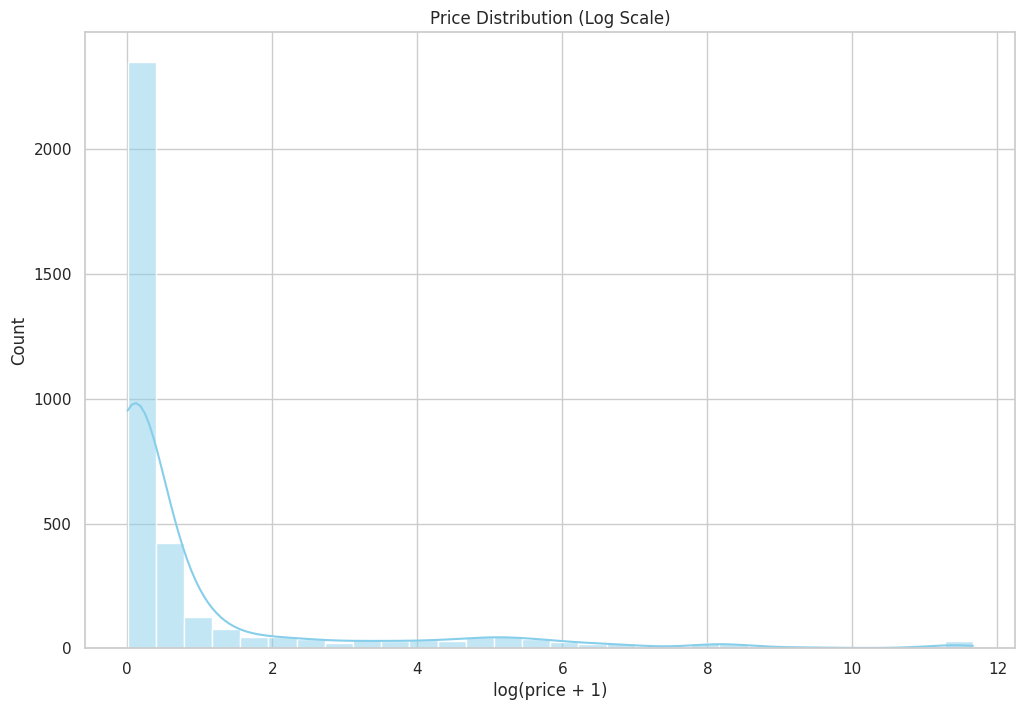

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df_filtered['price_log'], bins=30, color='skyblue', kde=True)
plt.title("Price Distribution (Log Scale)")
plt.xlabel("log(price + 1)")
plt.ylabel("Count")
plt.show()

# 2. Top 10 cryptocurrencies by market cap

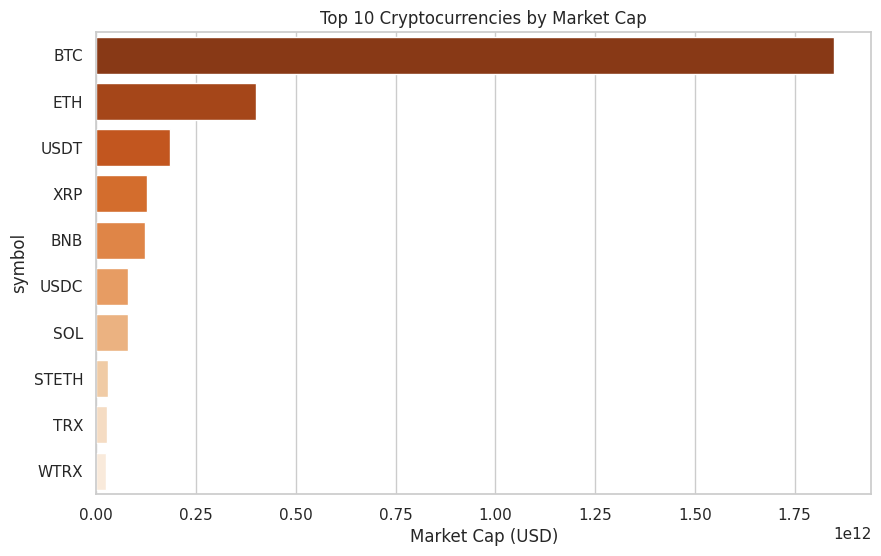

In [ ]:
top10 = df_filtered.sort_values('market_cap', ascending=False).head(10)
sns.barplot(x='market_cap', y='symbol', data=top10, hue='symbol', palette='Oranges_r', dodge=False, legend=False)
plt.xlabel("Market Cap (USD)")
plt.title("Top 10 Cryptocurrencies by Market Cap")
plt.show()

# 3. Price vs Market Cap

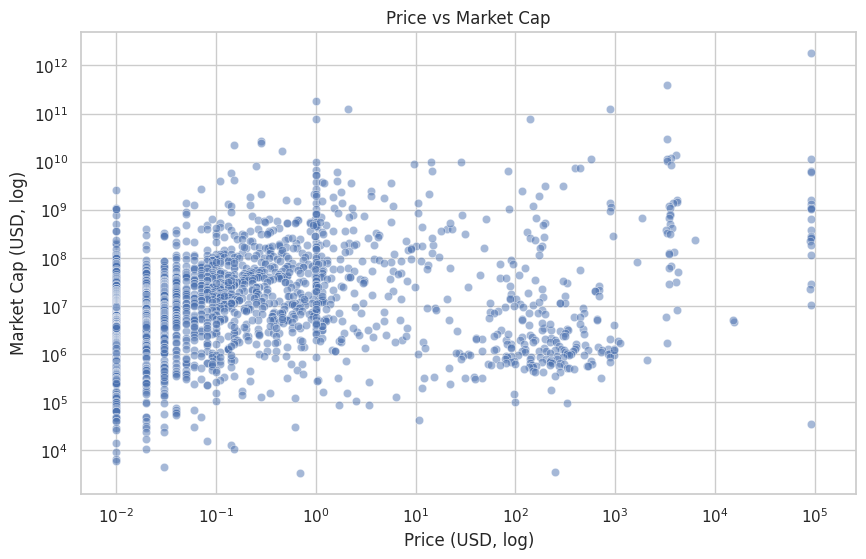

In [ ]:
sns.scatterplot(data=df_filtered, x='price_usd', y='market_cap', alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Price (USD, log)")
plt.ylabel("Market Cap (USD, log)")
plt.title("Price vs Market Cap")
plt.show()

# 4. Market Cap vs Volume

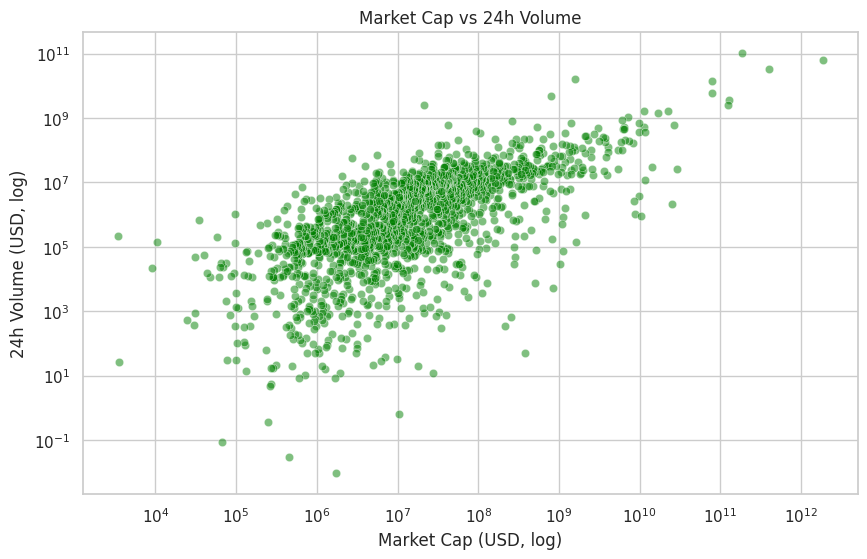

In [ ]:
sns.scatterplot(data=df_filtered, x='market_cap', y='volume_24h', alpha=0.5, color='green')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Market Cap (USD, log)")
plt.ylabel("24h Volume (USD, log)")
plt.title("Market Cap vs 24h Volume")
plt.show()

# 5. Top 10 categories by average liquidity


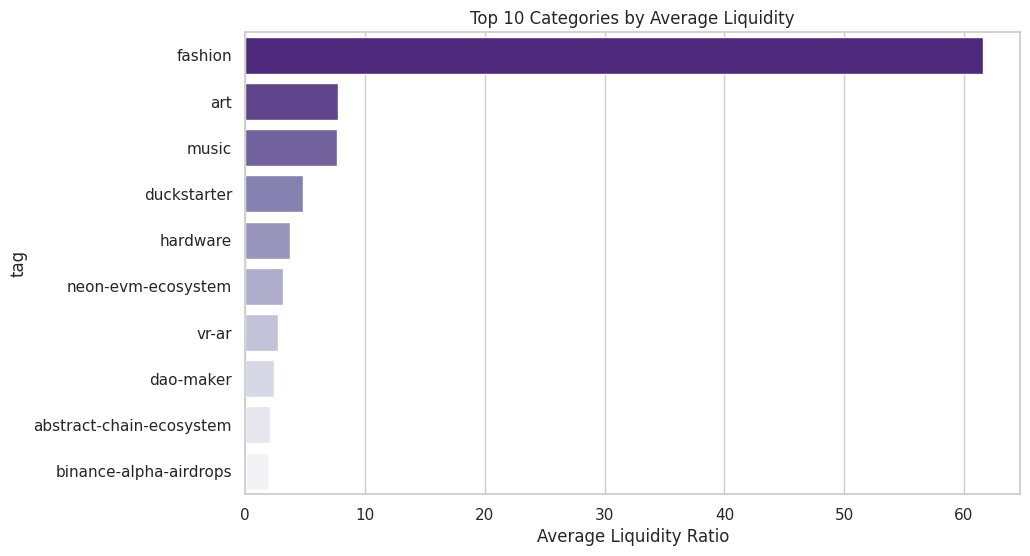

In [ ]:
top_cat_liquidity = tags_exploded_filtered.groupby('tag')['liquidity_ratio'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_cat_liquidity.values, y=top_cat_liquidity.index,
            hue=top_cat_liquidity.index, palette='Purples_r', dodge=False, legend=False)

plt.xlabel("Average Liquidity Ratio")
plt.title("Top 10 Categories by Average Liquidity")
plt.show()

# 6. Overpriced categories scatter plot (Price vs Liquidity)

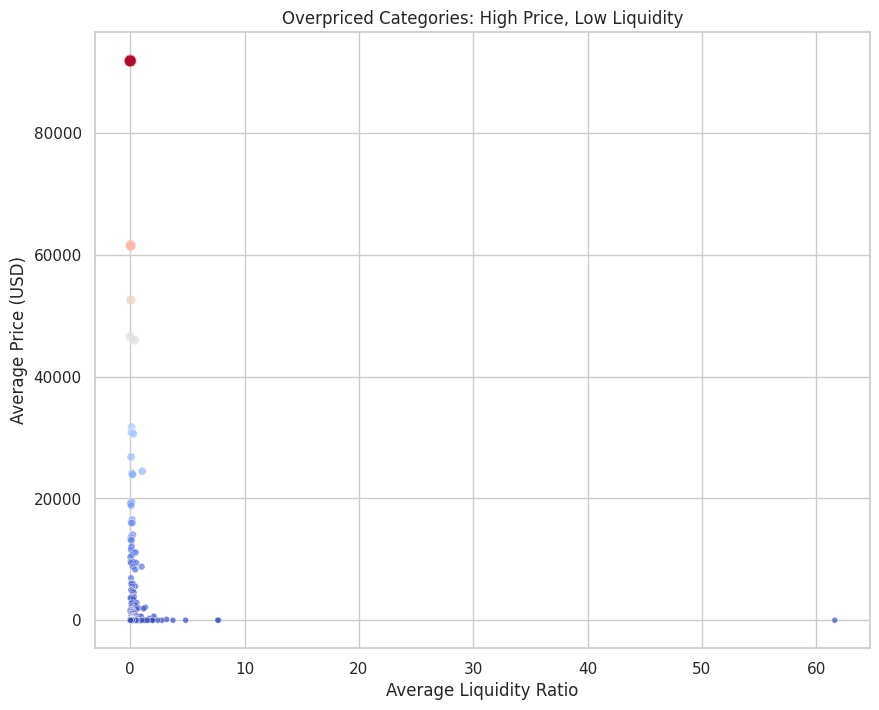

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=category_stats_filtered, x='avg_liquidity', y='avg_price', size='avg_price',
                hue='avg_price', palette='coolwarm', legend=False, alpha=0.7)
plt.xlabel("Average Liquidity Ratio")
plt.ylabel("Average Price (USD)")
plt.title("Overpriced Categories: High Price, Low Liquidity")
plt.show()

# Q7. PRICE VS MARKET CAP (INTERACTIVE)

In [ ]:
df_plot = df_filtered.copy()
df_plot['liquidity_ratio'] = df_plot['volume_24h'] / df_plot['market_cap']

df_plot = df_plot.replace([float('inf'), -float('inf')], None)
df_plot = df_plot.dropna(
    subset=['price_usd', 'market_cap', 'liquidity_ratio']
)

fig = px.scatter(
    df_plot,
    x='price_usd',
    y='market_cap',
    color='liquidity_ratio',
    hover_data=['name', 'symbol'],
    log_x=True,
    log_y=True,
    title="Price vs Market Cap (colored by Liquidity)"
)

fig.update_traces(
    marker=dict(
        size=6,
        opacity=0.7
    )
)

fig.show()

In [ ]:

display(
    category_stats_filtered
    .head(10)
    .style
    .format({
        'avg_price': '${:,.2f}',
        'avg_liquidity': '{:.2f}'
    })
)


,avg_price,avg_liquidity
tag,,
rsk-smart-bitcoin,"$91,954.51",0.00
rootstock-rsk-ecosystem,"$91,841.99",0.00
zeta-ecosystem,"$91,841.99",0.00
starknet-ecosystem,"$61,672.45",0.05
b²-network-ecosystem,"$61,454.19",0.04
corn-ecosystem,"$52,580.86",0.05
bouncebit-ecosystem,"$46,532.96",0.00
merlin-ecosystem,"$45,998.79",0.38
taiko-ecosystem,"$31,720.84",0.12
